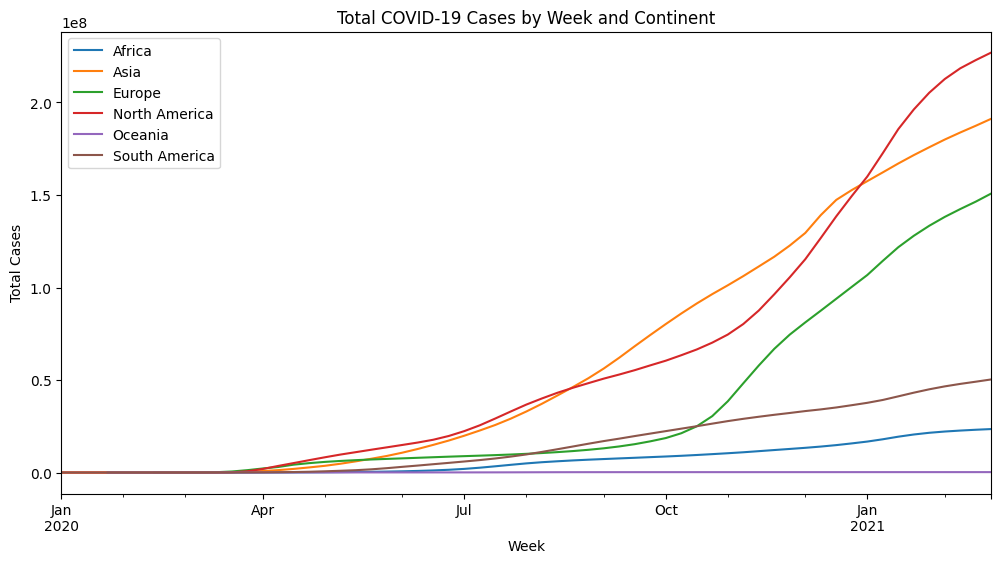

In [ ]:
import pandas as pd
df = pd.read_csv('data.csv', parse_dates=['Date'])
# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group data by week and calculate total cases per week for each continent
weekly_cases = df.pivot_table(index=pd.Grouper(key='Date', freq='W'), columns='Continent', values='Cases', aggfunc='sum')

# Create a line chart of weekly cases for each continent
weekly_cases.plot(figsize=(12, 6))
plt.xlabel('Week')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases by Week and Continent')
plt.legend()
plt.show()

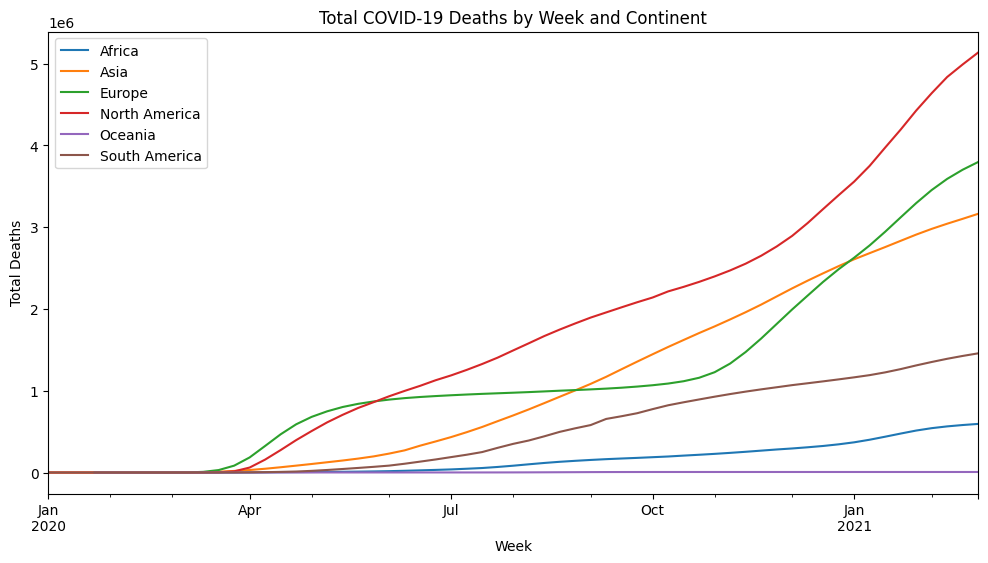

In [ ]:
# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group data by week and calculate total deaths per week for each continent
weekly_deaths = df.pivot_table(index=pd.Grouper(key='Date', freq='W'), columns='Continent', values='Deaths', aggfunc='sum')

# Create a line chart of weekly cases for each continent
weekly_deaths.plot(figsize=(12, 6))
plt.xlabel('Week')
plt.ylabel('Total Deaths')
plt.title('Total COVID-19 Deaths by Week and Continent')
plt.legend()
plt.show()

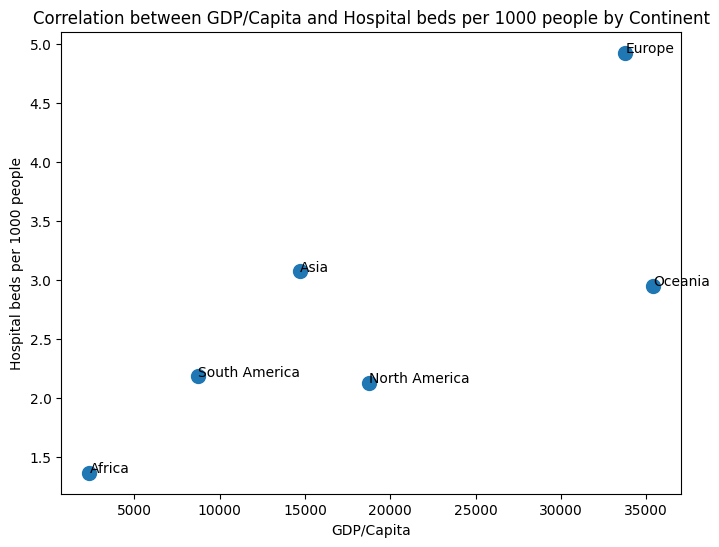

In [ ]:
# Group by continent and calculate the average GDP/capita and hospital beds per 1000 people
continent_data = df.groupby('Continent').agg({'GDP/Capita': 'mean', 'Hospital beds per 1000 people': 'mean'})

# Create a scatter plot of GDP/capita vs hospital beds per 1000 people, with each point labeled by continent
continent_data.plot(kind='scatter', x='GDP/Capita', y='Hospital beds per 1000 people', s=100, figsize=(8, 6))
for i, row in continent_data.iterrows():
    plt.annotate(i, xy=(row['GDP/Capita'], row['Hospital beds per 1000 people']))

# Set x and y axis labels and title
plt.xlabel('GDP/Capita')
plt.ylabel('Hospital beds per 1000 people')
plt.title('Correlation between GDP/Capita and Hospital beds per 1000 people by Continent')

# Show the plot
plt.show()

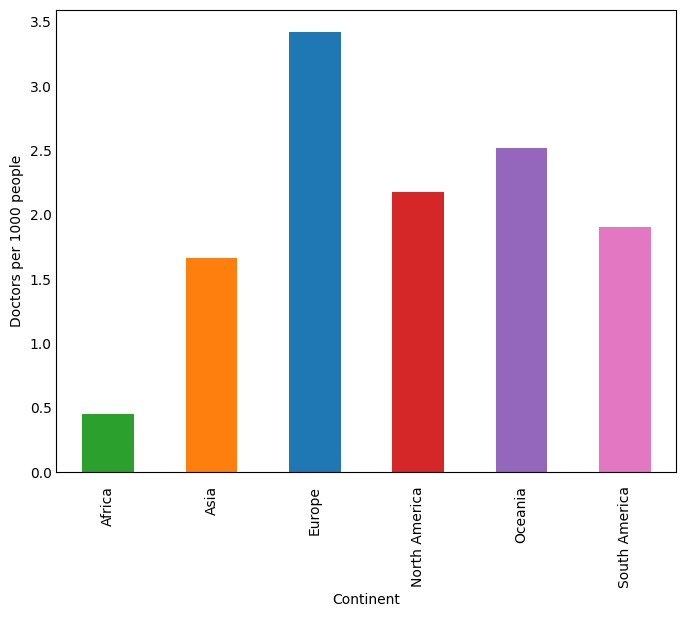

In [ ]:
# Compute population and doctors per 1000 people for each continent
continent_data = df.groupby('Continent').agg({'Population': 'sum', 'Medical doctors per 1000 people': 'mean'})
continent_data['Doctors per 1000 people'] = continent_data['Medical doctors per 1000 people']

# Create bar chart to visualize doctors per 1000 people for each continent
colors = {'Africa': 'tab:green', 'Asia': 'tab:orange', 'Europe': 'tab:blue', 'North America': 'tab:red',
          'Oceania': 'tab:purple', 'South America': 'tab:pink'}
ax = continent_data['Doctors per 1000 people'].plot(kind='bar', color=[colors[c] for c in continent_data.index], figsize=(8, 6))

# Set axis labels and tick parameters
ax.set_xlabel('Continent')
ax.set_ylabel('Doctors per 1000 people')
ax.tick_params(axis='x', length=0, pad=10)
ax.tick_params(axis='y', length=0)

plt.show()

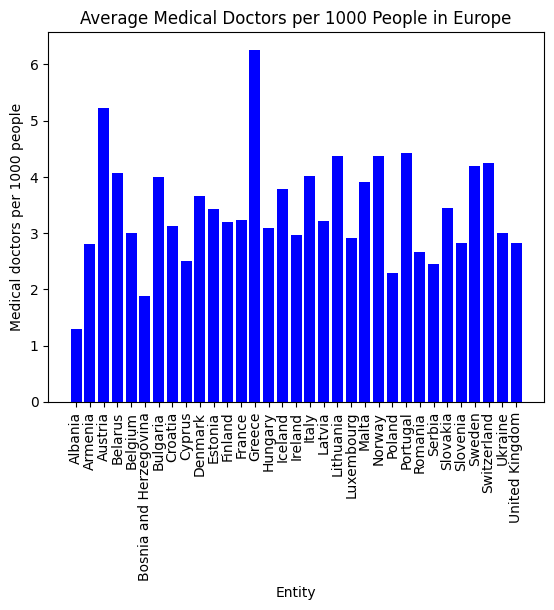

In [ ]:
europe_data = df.loc[(df['Continent'] == 'Europe') | (df['Entity'] == 'United States Of America')]
europe_doctors = europe_data.groupby('Entity')['Medical doctors per 1000 people'].mean().reset_index()

plt.bar(europe_doctors['Entity'], europe_doctors['Medical doctors per 1000 people'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('Entity')
plt.ylabel('Medical doctors per 1000 people')
plt.title('Average Medical Doctors per 1000 People in Europe')
plt.show()

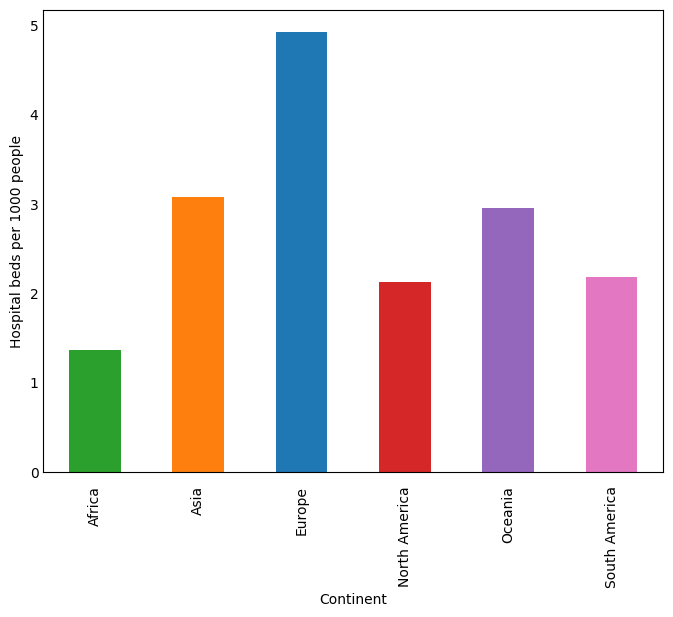

In [ ]:
# Compute population and doctors per 1000 people for each continent
continent_data = df.groupby('Continent').agg({'Population': 'sum', 'Hospital beds per 1000 people': 'mean'})
continent_data['Hospital beds per 1000 people'] = continent_data['Hospital beds per 1000 people']

# Create bar chart to visualize Hospital beds per 1000 people for each continent
colors = {'Africa': 'tab:green', 'Asia': 'tab:orange', 'Europe': 'tab:blue', 'North America': 'tab:red',
          'Oceania': 'tab:purple', 'South America': 'tab:pink'}
ax = continent_data['Hospital beds per 1000 people'].plot(kind='bar', color=[colors[c] for c in continent_data.index], figsize=(8, 6))

# Set axis labels and tick parameters
ax.set_xlabel('Continent')
ax.set_ylabel('Hospital beds per 1000 people')
ax.tick_params(axis='x', length=0, pad=10)
ax.tick_params(axis='y', length=0)

plt.show()

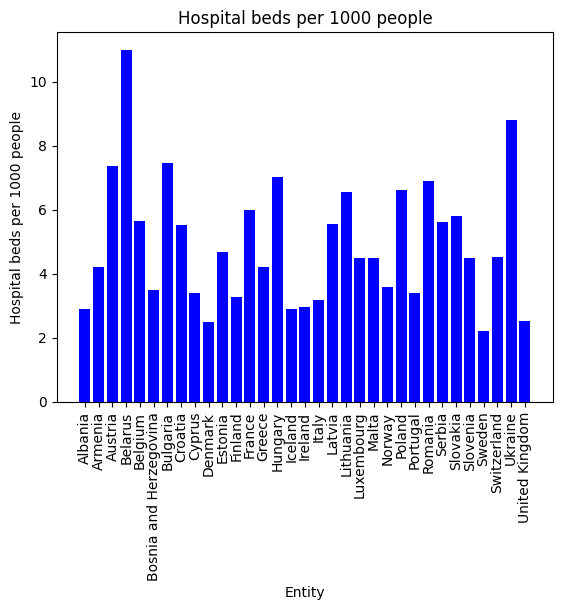

In [ ]:
europe_data = df.loc[(df['Continent'] == 'Europe') | (df['Entity'] == 'United States Of America')]
europe_doctors = europe_data.groupby('Entity')['Hospital beds per 1000 people'].mean().reset_index()

plt.bar(europe_doctors['Entity'], europe_doctors['Hospital beds per 1000 people'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('Entity')
plt.ylabel('Hospital beds per 1000 people')
plt.title('Hospital beds per 1000 people')
plt.show()

In [ ]:
grouped_data = df.groupby(['Entity']).agg({
    'Deaths': 'sum',
    'Daily tests': 'mean',
    'Cases': 'sum',
    'Population': 'first',
    'GDP/Capita': 'first',
    'Hospital beds per 1000 people': 'first',
    'Medical doctors per 1000 people': 'first',
    'Population aged 65 and over (%)': 'first',
    'Average temperature per year': 'first',
    'Continent': 'first'
}).reset_index()

grouped_data

,Entity,Deaths,Daily tests,Cases,Population,GDP/Capita,Hospital beds per 1000 people,Medical doctors per 1000 people,Population aged 65 and over (%),Average temperature per year,Continent
0,Albania,171892.0,1192.831956,8.426482e+06,2873457,5353.2,2.89,1.29,14,14,Europe
1,Algeria,547843.0,1033.333333,1.689236e+07,41318142,3974.0,1.90,1.83,6,25,Africa
2,Argentina,6622663.0,15390.744949,2.603827e+08,44271041,9912.3,5.00,3.91,11,14,South America
3,Armenia,428678.0,1880.339623,2.437030e+07,2930450,4622.7,4.20,2.80,11,11,Europe
4,Australia,186575.0,41312.128319,6.789426e+06,24598933,55060.3,3.84,3.50,16,22,Oceania
...,...,...,...,...,...,...,...,...,...,...,...
99,United States,73071478.0,912236.261111,3.228497e+09,325719178,65297.5,2.77,2.57,16,11,North America
100,Uruguay,36814.0,3013.138577,3.106163e+06,3456750,16190.1,2.80,3.74,15,16,South America
101,Vietnam,6973.0,5753.293103,3.292080e+05,95540800,2715.3,2.60,0.82,7,25,Asia
102,Zambia,96458.0,3390.600649,5.469924e+06,17094130,1305.1,2.00,0.09,2,21,Africa


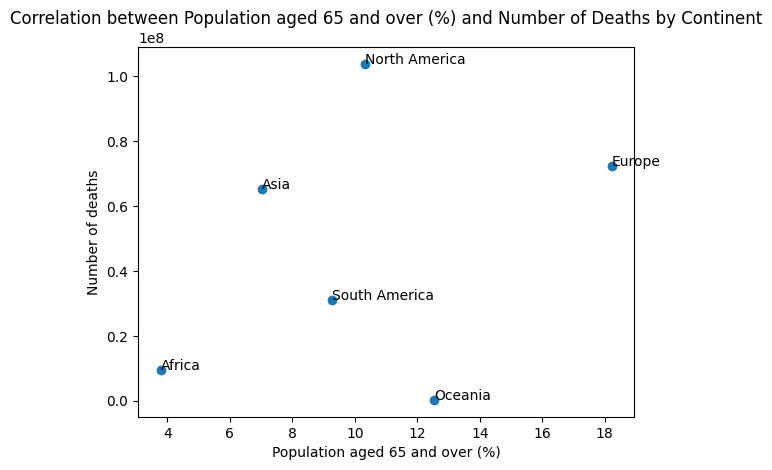

In [ ]:
# Group the data by continent and calculate the mean values of the relevant columns
continent_data = df.groupby('Continent').agg({
    'Population aged 65 and over (%)': 'mean',
    'Deaths': 'sum'
})

# Create a scatter plot of population aged 65 and over vs. number of deaths
fig, ax = plt.subplots()
ax.scatter(continent_data['Population aged 65 and over (%)'], continent_data['Deaths'])

# Add labels to the plot
ax.set_xlabel('Population aged 65 and over (%)')
ax.set_ylabel('Number of deaths')
ax.set_title('Correlation between Population aged 65 and over (%) and Number of Deaths by Continent')

# Annotate each point with its corresponding continent name
for i, row in continent_data.iterrows():
    ax.annotate(i, (row['Population aged 65 and over (%)'], row['Deaths']))

# Show the plot
plt.show()

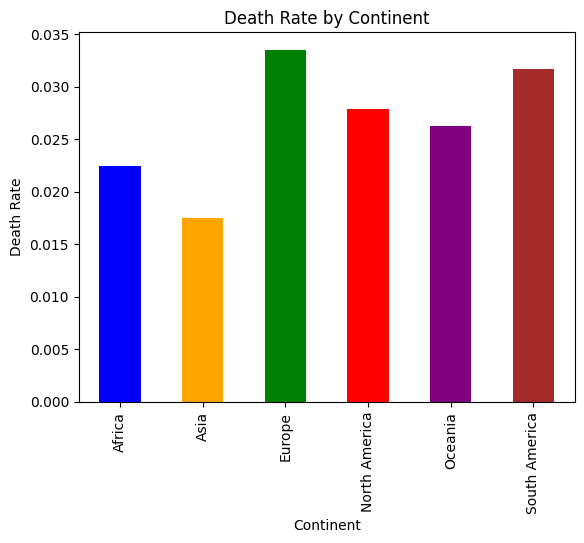

In [ ]:
# Group the data by continent and calculate the total deaths and cases
continent_data = df.groupby('Continent').agg({
    'Deaths': 'sum',
    'Cases': 'sum'
})

# Compute the death rate as the ratio of deaths to cases
continent_data['Death Rate'] = continent_data['Deaths'] / continent_data['Cases']

# Plot the death rate as a bar chart with different colors for each continent
continent_data['Death Rate'].plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.xlabel('Continent')
plt.ylabel('Death Rate')
plt.title('Death Rate by Continent')
plt.show()

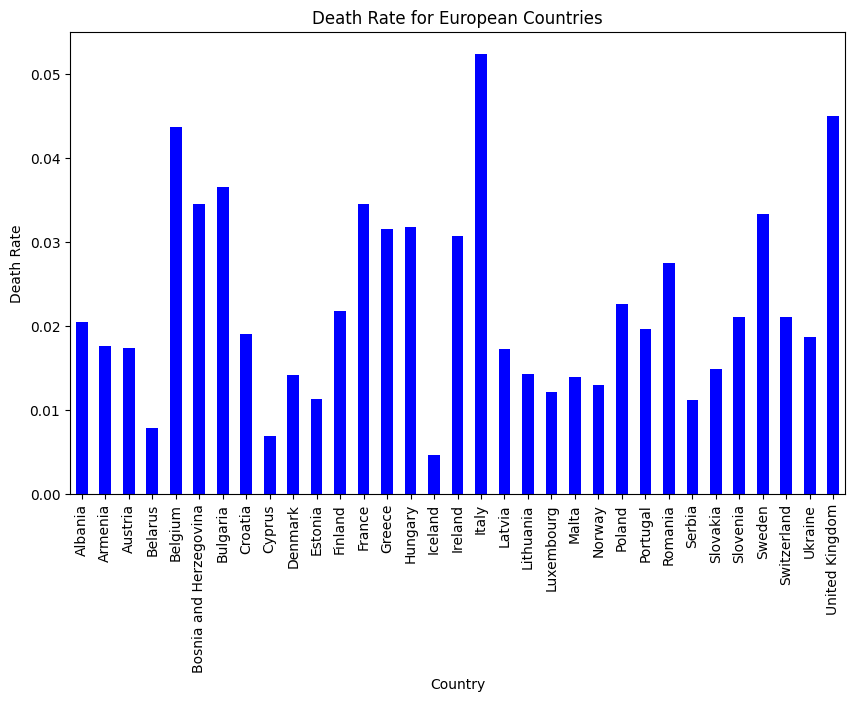

In [ ]:
# Filter the data for European countries
europe_data = df[df['Continent'] == 'Europe']

# Calculate the total number of cases and deaths for each country
country_data = europe_data.groupby('Entity').agg({
    'Cases': 'sum',
    'Deaths': 'sum'
})

# Calculate the death rate for each country
country_data['Death rate'] = country_data['Deaths'] / country_data['Cases']

# Plot the death rate for each country in a bar chart
ax = country_data['Death rate'].plot(kind='bar', color='blue', figsize=(10, 6))

# Set the title and axis labels
ax.set_title('Death Rate for European Countries')
ax.set_xlabel('Country')
ax.set_ylabel('Death Rate')

# Show the plot
plt.show()

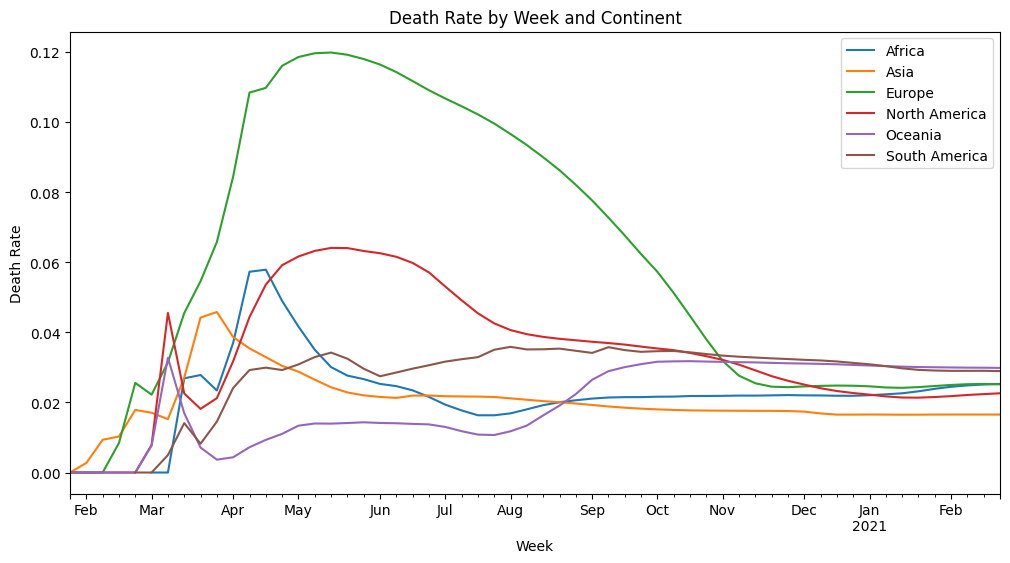

In [ ]:
# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group data by week and calculate total deaths and cases per week for each continent
weekly_data = df.groupby(['Continent', pd.Grouper(key='Date', freq='W')]).agg({
    'Deaths': 'sum',
    'Cases': 'sum'
})

# Compute the death rate as the ratio of deaths to cases
weekly_data['Death Rate'] = weekly_data['Deaths'] / weekly_data['Cases']

# Pivot the data to create separate series for each continent
continent_data = weekly_data.pivot_table(index='Date', columns='Continent', values='Death Rate')

# Plot the death rate over time for each continent
continent_data.plot(figsize=(12, 6))
plt.xlabel('Week')
plt.ylabel('Death Rate')
plt.title('Death Rate by Week and Continent')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('data.csv')

# Group the data by country and calculate the mean of daily tests
means = df.groupby(['Entity'])['Daily tests'].mean()

# Fill the empty cells with the mean of daily tests for each country
# df['Daily tests'] = df.groupby(['Entity'])['Daily tests'].transform(lambda x: x.fillna(means[x.name]))
df['Daily tests'] = df.groupby('Entity')['Daily tests'].transform(lambda x: x.fillna(int(x.mean())).astype(int))

# drops rows that are 0 or NaN
df = df[(df['Daily tests'].notna()) & (df['Daily tests'] != 0)]

df['Daily cases'] = df['Cases'] - df['Cases'].shift(1)
df = df[df['Daily cases'] >= 0]

# Print the updated dataframe
print(df)
df.to_csv('filleddailytests.csv', index=False)

# import pandas as pd

# # Load the data
# df = pd.read_csv('data.csv')

# # Sort the DataFrame by "Entity" and "Date"
# df.sort_values(by=['Entity', 'Date'], inplace=True)

# # Forward fill the empty cells in the "Daily tests" column within each entity
# df['Daily tests'] = df.groupby('Entity')['Daily tests'].fillna(method='bfill')

# df['Daily cases'] = df['Cases'] - df['Cases'].shift(1)
# df = df[df['Daily cases'] >= 0]

# # Print the updated dataframe
# print(df)
# df.to_csv('filleddailytests.csv', index=False)

         Entity Continent  Latitude  Longitude  Average temperature per year  \
14      Albania    Europe     41.15      20.17                            14   
15      Albania    Europe     41.15      20.17                            14   
16      Albania    Europe     41.15      20.17                            14   
17      Albania    Europe     41.15      20.17                            14   
18      Albania    Europe     41.15      20.17                            14   
...         ...       ...       ...        ...                           ...   
38467  Zimbabwe    Africa    -19.02      29.15                            20   
38468  Zimbabwe    Africa    -19.02      29.15                            20   
38469  Zimbabwe    Africa    -19.02      29.15                            20   
38470  Zimbabwe    Africa    -19.02      29.15                            20   
38471  Zimbabwe    Africa    -19.02      29.15                            20   

       Hospital beds per 1000 people  M

In [ ]:
# # Filter the data for European countries only
# europe_data = df[df['Continent'] == 'Europe']

# # Group the data by country and calculate the total deaths and cases
# country_data = europe_data.groupby('Entity').agg({
#     'Deaths': 'sum',
#     'Cases': 'sum'
# })

# # Compute the death rate as the ratio of deaths to cases
# country_data['Death Rate'] = country_data['Deaths'] / country_data['Cases']

# # Pivot the data to get the total deaths by week for each country
# weekly_deaths = europe_data.pivot_table(index=pd.Grouper(key='Date', freq='W'), columns='Entity', values='Deaths', aggfunc='sum')

# # Compute the death rate as the ratio of deaths to cases for each country
# weekly_death_rate = weekly_deaths.apply(lambda x: x / country_data.loc[x.name]['Cases'], axis=1)

# # Create a line chart of death rate for each country
# weekly_death_rate.plot(figsize=(12, 6))
# plt.xlabel('Week')
# plt.ylabel('Death Rate')
# plt.title('Death Rate by Week for European Countries')
# plt.legend()
# plt.show()

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('filleddailytests.csv')
# add a new column with the daily cases
df['Daily cases'] = df['Cases'].diff()
df['Daily cases'] = df['Daily cases'].fillna(0)

# Create a new column to store the cumulative daily tests
df['Cumulative tests'] = 0

# Initialize the previous country name to an empty string
prev_country = ''

# Loop through the rows of the DataFrame
for index, row in df.iterrows():

    # Get the country name for the current row
    country = row['Entity']

    # If the country name has changed, reset the cumulative daily tests count
    if country != prev_country:
        prev_country = country
        cumulative_tests = 0


        # Drop the first row for the new country
        df.drop(index, inplace=True)
        continue  # skip to the next iteration

    # Add the daily tests count to the cumulative daily tests count
    cumulative_tests += row['Daily tests']

    # Update the 'Cumulative tests' column with the new value
    df.at[index, 'Cumulative tests'] = cumulative_tests

    # Set the value of the 'Daily tests' column to 0 if the country name has changed
    if country != prev_country:
        df.at[index, 'Daily tests'] = 0

# Write the modified DataFrame to a new CSV file
df.to_csv('data_cum_tests.csv', index=False)
print(df)

         Entity Continent  Latitude  Longitude  Average temperature per year  \
1       Albania    Europe     41.15      20.17                            14   
2       Albania    Europe     41.15      20.17                            14   
3       Albania    Europe     41.15      20.17                            14   
4       Albania    Europe     41.15      20.17                            14   
5       Albania    Europe     41.15      20.17                            14   
...         ...       ...       ...        ...                           ...   
38073  Zimbabwe    Africa    -19.02      29.15                            20   
38074  Zimbabwe    Africa    -19.02      29.15                            20   
38075  Zimbabwe    Africa    -19.02      29.15                            20   
38076  Zimbabwe    Africa    -19.02      29.15                            20   
38077  Zimbabwe    Africa    -19.02      29.15                            20   

       Hospital beds per 1000 people  M

In [ ]:
import pandas as pd
df=pd.read_csv('data_cum_tests.csv')



# Calculate mortality rate, positivity rate, and infection rate
df['Mortality Rate'] = df['Deaths'] / df['Cases']*100
df['Positivity Rate'] = df['Cases'] / df['Cumulative tests']*100
df['Infection Rate'] = df['Cases'] / df['Population']*100

# Group the data by country and calculate the mean of each rate
grouped_df = df.groupby(['Entity']).agg({'Mortality Rate': 'mean', 'Positivity Rate': 'mean', 'Infection Rate': 'mean'})

# Rename the columns
grouped_df = grouped_df.rename(columns={'Mortality Rate': 'Mortality rate', 'Positivity Rate': 'Positivity rate', 'Infection Rate': 'Infection rate'})

# Reset the index so that the country names become a column
grouped_df = grouped_df.reset_index()

# Display the resulting table
print(grouped_df[['Entity', 'Mortality rate', 'Positivity rate', 'Infection rate']])
grouped_df.to_csv("grouped.csv", index=False )

            Entity  Mortality rate  Positivity rate  Infection rate
0          Albania        2.788132        14.995081        0.826062
1          Algeria        5.153533        18.309835        0.111097
2        Argentina        2.821475        27.184137        1.629241
3          Armenia        1.679846        15.140325        2.290972
4        Australia        2.282800         0.192084        0.069348
..             ...             ...              ...             ...
99   United States        3.389403         4.094513        2.465647
100        Uruguay        2.009344         1.420383        0.256696
101        Vietnam        2.521318         0.062596        0.000859
102         Zambia        2.072496         3.416691        0.092482
103       Zimbabwe        4.718605         3.534791        0.054812

[104 rows x 4 columns]


In [ ]:
import pandas as pd

# Read in the data from the csv file
df = pd.read_csv("data_cum_tests.csv")
# print(df)

# Group the data by country, sort by date in descending order, and extract the first row of each group
recent_data = df.groupby("Entity").apply(lambda x: x.sort_values(["Date"], ascending=False)).reset_index(drop=True).groupby("Entity").head(1)

df["Deaths"] = df['Deaths'].astype(float)
df["Deaths"] = df['Deaths'].astype(float)

# Calculate the mortality rate by dividing the number of deaths by the number of confirmed cases
mortality_rates = (recent_data["Deaths"] / recent_data["Cases"])

# Create a new dataframe with the country names and their corresponding mortality rates
result_df = pd.DataFrame({"Entity": recent_data["Entity"], "Mortality Rate": mortality_rates})

# Print the result dataframe
print(result_df)
result_df.to_csv("mortalityratefinal.csv", index=False)

              Entity  Mortality Rate
0            Albania        0.016759
355          Algeria        0.026377
723        Argentina        0.024659
1084         Armenia        0.018552
1447       Australia        0.031369
...              ...             ...
36132  United States        0.017937
36534        Uruguay        0.010484
36884        Vietnam        0.014297
37285         Zambia        0.013892
37631       Zimbabwe        0.040539

[104 rows x 2 columns]


In [ ]:
import pandas as pd

# Read in the data from the csv file
df = pd.read_csv("data_cum_tests.csv")
# print(df)
# Group the data by country, sort by date in descending order, and extract the first row of each group
recent_data = df.groupby("Entity").apply(lambda x: x.sort_values(["Date"], ascending=False)).reset_index(drop=True).groupby("Entity").head(1)

# df["Deaths"] = df['Deaths'].astype(float)

# Calculate the mortality rate by dividing the number of deaths by the number of confirmed cases
infection_rates = (recent_data["Cases"] / recent_data["Population"])

# Create a new dataframe with the country names and their corresponding mortality rates
result_df = pd.DataFrame({"Entity": recent_data["Entity"], "Infection Rate": infection_rates})

# Print the result dataframe
print(result_df)
result_df.to_csv("infectionrate.csv", index=False)

              Entity  Infection Rate
0            Albania        0.037295
355          Algeria        0.002737
723        Argentina        0.047601
1084         Armenia        0.058714
1447       Australia        0.001178
...              ...             ...
36132  United States        0.087823
36534        Uruguay        0.016777
36884        Vietnam        0.000026
37285         Zambia        0.004594
37631       Zimbabwe        0.002183

[104 rows x 2 columns]


In [ ]:
import pandas as pd

# Read in the data from the csv file
df = pd.read_csv("data_cum_tests.csv")
print(df)
# Group the data by country, sort by date in descending order, and extract the first row of each group
recent_data = df.groupby("Entity").apply(lambda x: x.sort_values(["Date"], ascending=False)).reset_index(drop=True).groupby("Entity").head(1)

# df["Deaths"] = df['Deaths'].astype(float)
# Calculate the mortality rate by dividing the number of deaths by the number of confirmed cases
positivity_rates = (recent_data["Cases"] / recent_data["Cumulative tests"])
print(positivity_rates)
# Create a new dataframe with the country names and their corresponding mortality rates
result_df = pd.DataFrame({"Entity": recent_data["Entity"], "Positivity rate": positivity_rates})

# Print the result dataframe
print(result_df)
result_df.to_csv("positivityrate.csv", index=False)

         Entity Continent  Latitude  Longitude  Average temperature per year  \
0       Albania    Europe     41.15      20.17                            14   
1       Albania    Europe     41.15      20.17                            14   
2       Albania    Europe     41.15      20.17                            14   
3       Albania    Europe     41.15      20.17                            14   
4       Albania    Europe     41.15      20.17                            14   
...         ...       ...       ...        ...                           ...   
37969  Zimbabwe    Africa    -19.02      29.15                            20   
37970  Zimbabwe    Africa    -19.02      29.15                            20   
37971  Zimbabwe    Africa    -19.02      29.15                            20   
37972  Zimbabwe    Africa    -19.02      29.15                            20   
37973  Zimbabwe    Africa    -19.02      29.15                            20   

       Hospital beds per 1000 people  M

In [ ]:
import pandas as pd

# read the three dataframes
df1 = pd.read_csv('mortalityratefinal.csv')
df2 = pd.read_csv('infectionrate.csv')
df3 = pd.read_csv('positivityrate.csv')

# merge the dataframes based on the first column
merged_df = pd.merge(df1, df2, on='Entity')
merged_df = pd.merge(merged_df, df3, on='Entity')

# print the merged dataframe
print(merged_df)
merged_df.to_csv("grouped.csv", index=False)


            Entity  Mortality Rate  Infection Rate  Positivity rate
0          Albania        0.016759        0.037295         0.242883
1          Algeria        0.026377        0.002737         0.297497
2        Argentina        0.024659        0.047601         0.338947
3          Armenia        0.018552        0.058714         0.252115
4        Australia        0.031369        0.001178         0.001762
..             ...             ...             ...              ...
99   United States        0.017937        0.087823         0.078004
100        Uruguay        0.010484        0.016777         0.054870
101        Vietnam        0.014297        0.000026         0.001061
102         Zambia        0.013892        0.004594         0.066944
103       Zimbabwe        0.040539        0.002183         0.082712

[104 rows x 4 columns]


                 0                   1                      2  \
0           Entity      Mortality Rate         Infection Rate   
1          Albania  0.0167588903300456      0.037295494590662   
2          Algeria  0.0263767552081491     0.0027371027477469   
3        Argentina  0.0246587563141648     0.0476014331806654   
4          Armenia  0.0185518836671355     0.0587138494087938   
..             ...                 ...                    ...   
100  United States  0.0179366894023698     0.0878231032500026   
101        Uruguay  0.0104838431561885     0.0167770304476748   
102        Vietnam   0.014297385620915  2.562256125131881e-05   
103         Zambia  0.0138920722234955     0.0045942086552518   
104       Zimbabwe  0.0405386682922774     0.0021832552687541   

                      3  
0       Positivity rate  
1    0.2428834978741149  
2    0.2974970077207381  
3     0.338946725741802  
4    0.2521151484780016  
..                  ...  
100  0.0780043347962537  
101  0.0548

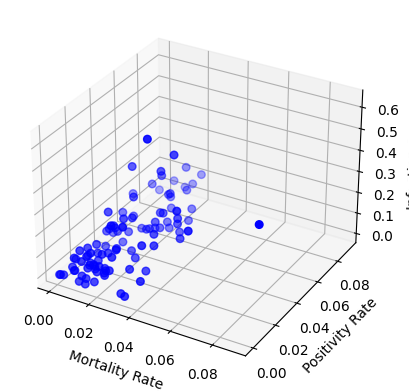

           Country  Mortality Rate  Positivity Rate  Infection Rate  Cluster
1          Albania        0.016759         0.037295        0.242883        3
2          Algeria        0.026377         0.002737        0.297497        3
3        Argentina        0.024659         0.047601        0.338947        3
4          Armenia        0.018552         0.058714        0.252115        3
5        Australia        0.031369         0.001178        0.001762        0
..             ...             ...              ...             ...      ...
100  United States        0.017937         0.087823        0.078004        0
101        Uruguay        0.010484         0.016777        0.054870        0
102        Vietnam        0.014297         0.000026        0.001061        0
103         Zambia        0.013892         0.004594        0.066944        0
104       Zimbabwe        0.040539         0.002183        0.082712        0

[104 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.cluster import KMeans


df = pd.read_csv('grouped.csv', header=None)
print(df)
df.columns = ['Country', 'Mortality Rate', 'Positivity Rate', 'Infection Rate']
df=df.drop(0)
df['Positivity Rate'] = df['Positivity Rate'].astype(float)
df['Mortality Rate'] = df['Mortality Rate'].astype(float)
df['Infection Rate'] = df['Infection Rate'].astype(float)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Mortality Rate'], df['Positivity Rate'], df['Infection Rate'], s=30, c='b', marker='o')
ax.set_xlabel('Mortality Rate')
ax.set_ylabel('Positivity Rate')
ax.set_zlabel('Infection Rate')
plt.show()


# perform clustering with KMeans algorithm
X = df.iloc[:, 1:]
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

# add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# print the resulting dataframe
print(df)

df.to_csv('clusters.csv', index=False)



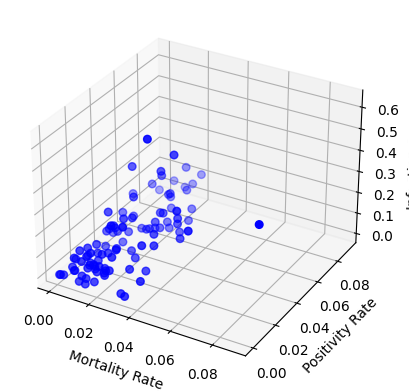

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



           Country  Mortality Rate  Positivity Rate  Infection Rate  Cluster
1          Albania        0.016759         0.037295        0.242883        3
2          Algeria        0.026377         0.002737        0.297497        3
3        Argentina        0.024659         0.047601        0.338947        3
4          Armenia        0.018552         0.058714        0.252115        3
5        Australia        0.031369         0.001178        0.001762        0
..             ...             ...              ...             ...      ...
100  United States        0.017937         0.087823        0.078004        0
101        Uruguay        0.010484         0.016777        0.054870        0
102        Vietnam        0.014297         0.000026        0.001061        0
103         Zambia        0.013892         0.004594        0.066944        0
104       Zimbabwe        0.040539         0.002183        0.082712        0

[104 rows x 5 columns]
Countries closest to Greece:
['Canada', 'Russia', 'S

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.cluster import KMeans

df = pd.read_csv('grouped.csv', header=None)
df.columns = ['Country', 'Mortality Rate', 'Positivity Rate', 'Infection Rate']
df = df.drop(0)
df['Positivity Rate'] = df['Positivity Rate'].astype(float)
df['Mortality Rate'] = df['Mortality Rate'].astype(float)
df['Infection Rate'] = df['Infection Rate'].astype(float)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Mortality Rate'], df['Positivity Rate'], df['Infection Rate'], s=30, c='b', marker='o')
ax.set_xlabel('Mortality Rate')
ax.set_ylabel('Positivity Rate')
ax.set_zlabel('Infection Rate')
plt.show()

# Perform clustering with KMeans algorithm
X = df.iloc[:, 1:]
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

# Add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Print the resulting dataframe
print(df)

# Save the resulting dataframe with cluster labels
df.to_csv('clusters.csv', index=False)

# Get the cluster label of Greece
greece_cluster = df[df['Country'] == 'Greece']['Cluster'].values[0]

# Get up to 25 countries closest to Greece (belonging to the same cluster as Greece)
closest_countries = df[df['Cluster'] == greece_cluster]['Country'].tolist()

# Exclude Greece from the list of closest countries
closest_countries.remove('Greece')

# Calculate the distances between each country and Greece based on the three features
distances = []
greece_data = df[df['Country'] == 'Greece'].iloc[:, 1:4].values
for country in closest_countries:
    country_data = df[df['Country'] == country].iloc[:, 1:4].values
    distance = ((country_data - greece_data) ** 2).sum(axis=1) ** 0.5
    distances.append(distance[0])

# Sort the countries based on distance in ascending order
closest_countries = [x for _, x in sorted(zip(distances, closest_countries))]

# Print up to 25 closest countries in order of closeness
print("Countries closest to Greece:")
print(closest_countries[:50])


In [ ]:
import plotly.express as px

# Read the data into a pandas dataframe
df = pd.read_csv('clusters.csv')

# Create a 3D scatter plot
fig = px.scatter_3d(df, x='Mortality Rate', y='Positivity Rate', z='Infection Rate',
                    color='Cluster', symbol='Cluster', hover_name='Country', opacity=0.7,
                    color_continuous_scale=px.colors.sequential.Viridis)

# Show the plot
fig.show()

            Date  Positivity
1447  2020-01-28    0.000000
1448  2020-01-29    0.002421
1449  2020-01-30    0.007262
1450  2020-01-31    0.000000
1451  2020-02-01    0.007262
...          ...         ...
37911 2020-12-28    7.465825
37912 2020-12-29    7.458913
37913 2020-12-30   12.185215
37914 2020-12-31   14.430531
37915 2021-01-01    5.898342

[15901 rows x 2 columns]
Epoch 1/4
1816/1816 [==============================] - 40s 19ms/step - loss: 13.9005 - val_loss: 9.8984
Epoch 2/4
1816/1816 [==============================] - 35s 19ms/step - loss: 13.8034 - val_loss: 9.5985
Epoch 3/4
1816/1816 [==============================] - 34s 19ms/step - loss: 13.7793 - val_loss: 9.5645
Epoch 4/4
1816/1816 [==============================] - 35s 19ms/step - loss: 13.7667 - val_loss: 9.6011
Test results: 9.60112476348877
12/12 [==============================] - 0s 8ms/step


<ipython-input-4-4377ffb31c5b>:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['Positivity'] = group['Daily cases'] / group['Daily tests'] * 100


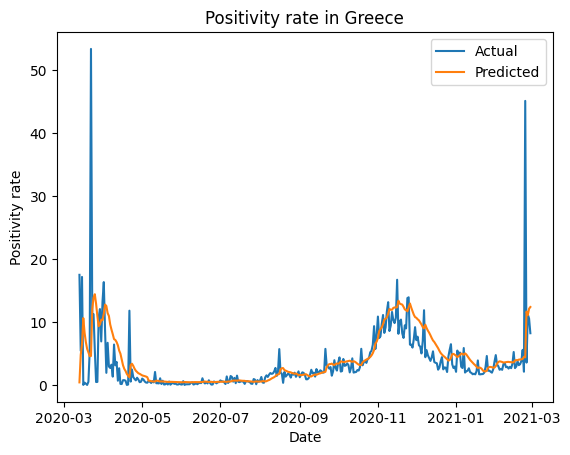


            Positivity
Date                  
2020-02-28    0.006475
2020-02-29    0.000000
2020-03-01    0.019426
2020-03-02    0.000000
2020-03-03    0.000000
...                ...
2020-12-28    6.472271
2020-12-29    3.272887
2020-12-30    2.690276
2020-12-31    2.919525
2021-01-01    2.084570

[309 rows x 1 columns]
1/1 [==============================] - 0s 61ms/step


<ipython-input-4-4377ffb31c5b>:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_greece['Positivity'] = grouped_greece['Daily cases'] / grouped_greece['Daily tests'] * 100


Predicted positivity rate for Greece for the next day: 4.296118158108561
1/1 [==============================] - 0s 36ms/step
Predicted positivity rate for Greece for the next day: 4.29771817654144
1/1 [==============================] - 0s 45ms/step
Predicted positivity rate for Greece for the next day: 4.372619441927029


In [ ]:
#globalmodel
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout
from keras.metrics import MeanSquaredError, MeanAbsoluteError
from pandas.tseries.offsets import DateOffset

entity_names = ['Greece','Canada', 'Russia', 'Saudi Arabia', 'Kazakhstan', 'India', 'Myanmar', 'Togo', 'Finland', 'Japan', 'Norway', 'Rwanda', 'Philippines', 'South Korea', 'Iceland', 'Uruguay', 'Sri Lanka', 'Uganda', 'Malaysia', 'Cuba', 'Jordan', 'Pakistan', 'Cyprus', 'Australia', 'Denmark', 'Fiji', 'Malta', 'Austria', 'Trinidad and Tobago', 'Latvia', 'Ireland', 'Zambia', 'El Salvador', 'Vietnam', 'Slovakia', 'Thailand', 'New Zealand', 'France', 'United Arab Emirates', 'Ethiopia', 'United Kingdom', 'Italy', 'Bhutan', 'Mongolia', 'Zimbabwe', 'Turkey', 'Chile', 'Estonia', 'Senegal', 'Belarus', 'Sweden']

# Load data from CSV file
df = pd.read_csv('data_cum_tests.csv', parse_dates=['Date'])

# filter
df = df[df['Entity'].isin(entity_names)]

# Group by country
grouped = df.groupby('Entity')
# print(grouped)
# Initialize an empty DataFrame to hold the processed data
processed_df = pd.DataFrame()

# Iterate over each group
for name, group in grouped:
    # Compute positivity rate and add it as a new column
    group['Positivity'] = group['Daily cases'] / group['Daily tests'] * 100

    # Drop unnecessary columns
    # group = group[['Date', 'Positivity', 'Daily tests', 'Daily cases']]
    group = group[['Date', 'Positivity']]
    # Drop rows after 2021-01-01
    group = group.loc[group['Date'] <= '2021-01-01']

    # Fill missing values using interpolation
    group = group.interpolate(method='bfill')



    # Add the processed group to the processed DataFrame
    processed_df = pd.concat([processed_df, group], axis=0)

print(processed_df)


# Set the Date column as the index
processed_df.set_index('Date', inplace=True)
# print(processed_df)
# Scale the data using a RobustScaler
scaler = RobustScaler()
processed_data = scaler.fit_transform(processed_df)
# print(df)

# Define the lookback window size
lookback = 14 #oi epomenes 2 evdomades tha einai krisimes

# Generate input-output pairs using a sliding window approach
X = []
y = []
for i in range(lookback, len(processed_data)):
    X.append(processed_data[i-lookback:i])
    y.append(processed_data[i, 0])  # Predict the first column (Positivity)

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(14, input_shape=(lookback, processed_data.shape[1]), activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

# Train the LSTM model
history = model.fit(X_train, y_train, epochs=4, batch_size=7, validation_data=(X_test, y_test))


# Evaluate the model on the test set
test_results = model.evaluate(X_test, y_test, verbose=0)

print(f'Test results: {test_results}')

# Save the model to a file
model.save('modelglobal.h5')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the data
y_test_inv = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), processed_data.shape[1]-1))), axis=1))[:, 0]
y_pred_inv = scaler.inverse_transform(np.concatenate((y_pred, np.zeros((len(y_pred), processed_data.shape[1]-1))), axis=1))[:, 0]

# Plot the predicted and actual Positivity values
import matplotlib.pyplot as plt

country = 'Greece'
group = df[df['Entity'] == country]

# Compute positivity rate and add it as a new column
group['Positivity'] = group['Daily cases'] / group['Daily tests'] * 100

# Drop unnecessary columns
# group = group[['Date', 'Positivity', 'Daily tests', 'Daily cases']]
group = group[['Date', 'Positivity']]

# Fill missing values using interpolation
group = group.interpolate(method='bfill')

# Set the Date column as the index
group.set_index('Date', inplace=True)

# Scale the data using the same RobustScaler as before
processed_data = scaler.transform(group)

X = []
y = []
for i in range(lookback, len(processed_data)):
    X.append(processed_data[i-lookback:i])
    y.append(processed_data[i, 0])  # Predict the first column (Positivity)

X, y = np.array(X), np.array(y)


y_pred = model.predict(X)

# Inverse transform the data
y_inv = scaler.inverse_transform(np.concatenate((y.reshape(-1, 1), np.zeros((len(y), processed_data.shape[1]-1))), axis=1))[:, 0]
y_pred_inv = scaler.inverse_transform(np.concatenate((y_pred, np.zeros((len(y_pred), processed_data.shape[1]-1))), axis=1))[:, 0]

# Plot the predicted and actual Positivity values
plt.plot(group.index[lookback:], y_inv, label='Actual')
plt.plot(group.index[lookback:], y_pred_inv, label='Predicted')
plt.title(f'Positivity rate in {country}')
plt.xlabel('Date')
plt.ylabel('Positivity rate')
plt.legend()
plt.show()

# ----------------------------------------------------------------------------------

# Filter the groups to keep only Greece
grouped_greece = grouped.get_group('Greece')


# Compute positivity rate and add it as a new column
grouped_greece['Positivity'] = grouped_greece['Daily cases'] / grouped_greece['Daily tests'] * 100

# Drop unnecessary columns
# grouped_greece = grouped_greece[['Date', 'Positivity', 'Daily tests', 'Daily cases']]
grouped_greece = grouped_greece[['Date', 'Positivity']]

print()
# Drop rows after 2021-01-01
grouped_greece = grouped_greece[grouped_greece['Date'] <= '2021-01-01']

# Fill missing values using interpolation
grouped_greece = grouped_greece.interpolate(method='bfill')

# Set the Date column as the index
grouped_greece.set_index('Date', inplace=True)
print(grouped_greece)




last_date = grouped_greece.index[-1]
next_3_days = pd.date_range(last_date, periods=3, freq='D')


for day in next_3_days:

    last_date = grouped_greece.index[-1]

    # Scale the data using a RobustScaler
    scaler = RobustScaler()
    processed_data = scaler.fit_transform(grouped_greece)


    # Get the last `lookback` number of data points from the dataset
    last_data_points = processed_data[-lookback:]

    # Reshape the data to match the input shape of the model
    X_pred = last_data_points.reshape(1, lookback, processed_data.shape[1])

    # Use the model to predict the positivity rate for the next day
    y_pred = model.predict(X_pred)

    # Inverse transform the data
    y_pred_inv = scaler.inverse_transform(np.concatenate((y_pred, np.zeros((len(y_pred), processed_data.shape[1]-1))), axis=1))[:, 0]

    next_day = day + pd.DateOffset(days=1)
    # create a new row with a timestamp index
    # new_row = pd.Series(y_pred_inv, name=next_day)
    # print(new_row)

    grouped_greece.loc[next_day, "Positivity"] = y_pred_inv[0]

    # print(grouped_greece)

    # Print the predicted positivity rate for Greece
    print(f"Predicted positivity rate for Greece for the next day: {y_pred_inv[0]}")

To median gia ta daily tests otan fillarei na ghnei forward fill ?

DONE: Provlepsh gia tis 3 epomens meres sto globalmodel


DONE: To SVM/SVR

DONE: Epanaprosdiorismos tou dataset gia tio global model vasismeno se xwres me koinh apotelesmatikothta me thn ellada

Genikws ligo checdk ta data gia cleanup

Plotting apotelesmatwn gia na einai visual gia thn anafora

H anafora


Test MSE: 0.39140450801872867
Test MAE: 0.2705064472434097


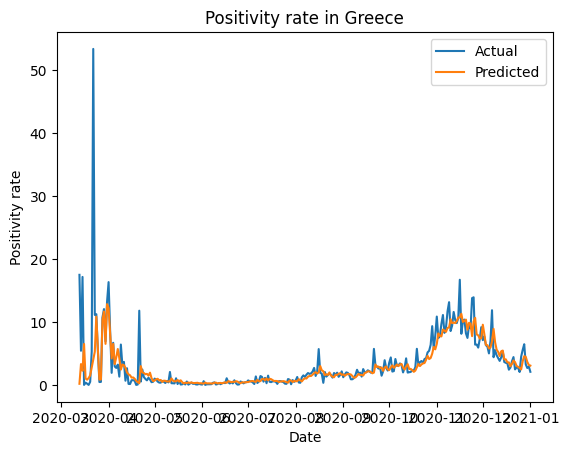

Predicted positivity rate for Greece for 2021-01-02 00:00:00: 3.08154696771802
Predicted positivity rate for Greece for 2021-01-03 00:00:00: 3.8115597327468875
Predicted positivity rate for Greece for 2021-01-04 00:00:00: 3.9141799803460735


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


entity_names = ['Greece','Canada', 'Russia', 'Saudi Arabia', 'Kazakhstan', 'India', 'Myanmar', 'Togo', 'Finland', 'Japan', 'Norway',
                'Rwanda', 'Philippines', 'South Korea', 'Iceland', 'Uruguay', 'Sri Lanka', 'Uganda', 'Malaysia', 'Cuba',
                'Jordan', 'Pakistan', 'Cyprus', 'Australia', 'Denmark', 'Fiji']

# Load data from CSV file
df = pd.read_csv('data_cum_tests.csv', parse_dates=['Date'])

# filter
processed_df = df[df['Entity'].isin(entity_names)]

# Group by country
grouped = processed_df.groupby('Entity')
# Initialize an empty DataFrame to hold the processed data
processed_df = pd.DataFrame()

# Iterate over each group
for name, group in grouped:
    # Compute positivity rate and add it as a new column
    group['Positivity'] = group['Daily cases'] / group['Daily tests'] * 100

    # Drop unnecessary columns
    group = group[['Date', 'Positivity']]
    # Drop rows after 2021-01-01
    group = group.loc[group['Date'] <= '2021-01-01']

    # Fill missing values using interpolation
    group = group.interpolate(method='bfill')

    # Add the processed group to the processed DataFrame
    processed_df = pd.concat([processed_df, group], axis=0)

# Set the Date column as the index
processed_df.set_index('Date', inplace=True)

# Scale the data using a RobustScaler
scaler = RobustScaler()
processed_data = scaler.fit_transform(processed_df)

# Define the lookback window size
lookback = 14

# Generate input-output pairs using a sliding window approach
X = []
y = []
for i in range(lookback, len(processed_data)):
    X.append(processed_data[i-lookback:i])
    y.append(processed_data[i, 0])  # Predict the first column (Positivity)

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Build the SVM model

model = SVR(kernel='rbf', C=10, epsilon=0.1)


# Train the SVM model
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Make predictions on the test set
y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Test MSE: {mse}')
print(f'Test MAE: {mae}')

# Save the model to a file (if needed)
# joblib.dump(model, 'modelglobal.pkl')

# Make predictions for Greece
country = 'Greece'
group = df[df['Entity'] == country]

group = group.loc[group['Date'] <= '2021-01-01']

# Compute positivity rate and add it as a new column
group['Positivity'] = group['Daily cases'] / group['Daily tests'] * 100

# Drop unnecessary columns
group = group[['Date', 'Positivity']]

# Fill missing values using interpolation
group = group.interpolate(method='bfill')

# Set the Date column as the index
group.set_index('Date', inplace=True)

# Scale the data using the same RobustScaler as before
processed_data = scaler.transform(group)

X_pred = []
for i in range(lookback, len(processed_data)):
    X_pred.append(processed_data[i-lookback:i])

X_pred = np.array(X_pred)

# Make predictions for Greece using the SVM model
y_pred = model.predict(X_pred.reshape(X_pred.shape[0], -1))

# Inverse transform the data
y_pred_inv = scaler.inverse_transform(np.concatenate((y_pred.reshape(-1, 1), np.zeros((len(y_pred), processed_data.shape[1]-1))), axis=1))[:, 0]

# Plot the predicted and actual Positivity values
plt.plot(group.index[lookback:], group['Positivity'].values[lookback:], label='Actual')
plt.plot(group.index[lookback:], y_pred_inv, label='Predicted')
plt.title(f'Positivity rate in {country}')
plt.xlabel('Date')
plt.ylabel('Positivity rate')
plt.legend()
plt.show()

# Forecast the next 3 days for Greece
last_date = group.index[-1]
next_3_days = pd.date_range(last_date, periods=3, freq='D')

# print(processed_data)

for day in next_3_days:

    processed_data = scaler.transform(group)

    # Get the last `lookback` number of data points from the dataset
    last_data_points = processed_data[-lookback:]

    # print(last_data_points)

    # Reshape the data to match the input shape of the model
    X_pred = last_data_points.reshape(1, -1)

    # Use the model to predict the positivity rate for the next day
    y_pred = model.predict(X_pred)

    # Inverse transform the data
    y_pred_inv = scaler.inverse_transform(np.concatenate((y_pred.reshape(-1, 1), np.zeros((len(y_pred), processed_data.shape[1]-1))), axis=1))[:, 0]

    next_day = day + pd.DateOffset(days=1)

    # processed_data=np.append(processed_data, y_pred.reshape(-1, 1))

    group.loc[next_day, "Positivity"] = y_pred_inv[0]

    # print(processed_data)
    # print(group)

    # Print the predicted positivity rate for Greece
    print(f"Predicted positivity rate for Greece for {next_day}: {y_pred_inv[0]}")


